In [65]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [174]:
SOURCE_PATH = r'C:/Users/alexf/Desktop/intel_adv_ai/intel_adv_ai/noise_figures/6.png'

Number of Contours found = 1
aria formei: 0.12467447916666666
green


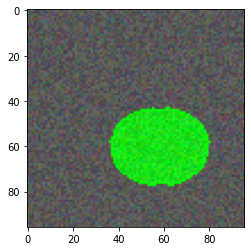

In [175]:
image = Image.open(SOURCE_PATH)

image_ = np.array(image.copy())
image_ = cv2.cvtColor(image_, cv2.COLOR_RGB2BGR)
image_[image_ < (127,127,127)] = 0

# Grayscale
gray = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contours) != 0 :
    print("Number of Contours found = " + str(len(contours)))
    areas = [cv2.contourArea(cnt) for cnt in contours]
    max_area_idx = np.argmax(areas)
    x, y = contours[max_area_idx].T
    left, top, right, bottom = (np.min(x), np.min(y), np.max(x), np.max(y))

    # Draw all contours
    # -1 signifies drawing all contours
    aria_formei = cv2.contourArea(contours[max_area_idx])
    print(f'aria formei: {((100 * aria_formei) / 9216) / 100}')
    image = np.array(image)
    cv2.drawContours(image, contours[max_area_idx], -1, (0, 255, 0), 1)

    center = [int((left+right)/2), int((bottom+top)/2)]
    r, g, b = image[center[1]][center[0]]
    plt.imshow(image)
    if r > 127 :
        print("red")
    elif g > 127 :
        print("green")
    elif b > 127 :
        print("blue")
        
else:
    image = Image.open(SOURCE_PATH)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR) # aici
    image_ = np.array(image.copy())
    image_ = cv2.cvtColor(image_, cv2.COLOR_RGB2BGR)
    image_[image_ < (127,127,127)] = 0

    # Grayscale
    gray = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)

    # Find Canny edges
    edged = cv2.Canny(gray, 30, 200)

    # Finding Contours
    # Use a copy of the image e.g. edged.copy()
    # since findContours alters the image
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    print("Number of Contours found = " + str(len(contours)))

    areas = [cv2.contourArea(cnt) for cnt in contours]
    max_area_idx = np.argmax(areas)
    x, y = contours[max_area_idx].T
    left, top, right, bottom = (np.min(x), np.min(y), np.max(x), np.max(y))

    # Draw all contours
    # -1 signifies drawing all contours
    aria_formei = cv2.contourArea(contours[max_area_idx])
    print(f'aria formei: {((100 * aria_formei) / 9216) / 100}')
    image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB) # aici
    image = np.array(image)
    cv2.drawContours(image, contours[max_area_idx], -1, (0, 255, 0), 1)
    Image.fromarray(image).show()
    center = [int((left+right)/2), int((bottom+top)/2)]
    r, g, b = image[center[1]][center[0]]
    if r > 127 :
        print("red")
    elif g > 127 :
        print("green")
    elif b > 127 :
        print("blue")